### Load image using PTL

PNG
(118, 177)
RGBA


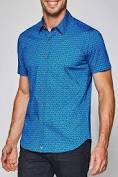

In [48]:
# load and show an image with Pillow
from PIL import Image
# Open the image form working directory
image = Image.open('pics/shirt0.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image

In [49]:
# Get array
Arr_image = np.asarray(image)
Arr_image.shape

(177, 118, 4)

### Resize by PTL

In [23]:
rsize = image.resize((np.array(image.size)/5).astype(int)) # Use PIL to resize
rsize

OR (resizing all pics to the same size)

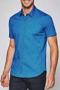

In [42]:
load_img_rz = np.array(image.resize((60,90))) #(row,col)

Image.fromarray(load_img_rz).save('img_rz.png')
img_rz = Image.open('img_rz.png')

img_rz

In [28]:
print("After resizing:",load_img_rz.shape)

After resizing: (90, 60, 4)


OR maxpooling

#### Crop image by PTL

Before trimming: (177, 118, 4)
After trimming: (125, 95, 4)


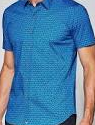

In [40]:
im = np.array(image)

print("Before trimming:",im.shape)

trim = im[25:150, 15:110]
print("After trimming:",trim.shape)

Image.fromarray(trim).save('im_trim.png')
im_trim = Image.open('im_trim.png')

im_trim

### Extract features from image data

#### Method 1: Mean Pixel Value of Channels

Instead of using the pixel values from the three channels separately, we can generate a new matrix that has the mean value of pixels from all three channels.

By doing so, the number of features remains the same and we also take into account the pixel values from all three channels of the image. Let us code this out in Python. We will create a new matrix with the same size 660 x 450, where all values are initialized to 0. This matrix will store the mean pixel values for the three channels:

![fig1](pics/fig1.png)
![fig2](pics/fig2.png)

In [53]:
feature_matrix = np.zeros((177, 118)) 
feature_matrix.shape

(177, 118)

In [58]:
#To get the average pixel values, we will use a for loop:
for i in range(0,Arr_image.shape[0]):
    for j in range(0,Arr_image.shape[1]):
        feature_matrix[i][j] = ((int(Arr_image[i,j,0]) + int(Arr_image[i,j,1]) 
                                 + int(Arr_image[i,j,2]))/3)

The new matrix will have the same height and width but only 1 channel. Now we can append the pixel values one after the other to get a 1D array:

In [59]:
feature_matrix

array([[201.        , 201.        , 202.        , ..., 201.33333333,
        201.33333333, 201.33333333],
       [201.        , 201.        , 202.        , ..., 201.33333333,
        201.33333333, 201.33333333],
       [202.        , 202.        , 202.        , ..., 201.33333333,
        201.33333333, 201.33333333],
       ...,
       [214.33333333, 218.66666667, 222.33333333, ..., 180.        ,
        181.        , 183.        ],
       [223.        , 204.        , 212.33333333, ..., 180.        ,
        182.        , 183.        ],
       [214.33333333, 214.33333333, 214.        , ..., 180.        ,
        181.        , 183.        ]])

In [60]:
features = np.reshape(feature_matrix, (Arr_image.shape[0]*Arr_image.shape[1])) 
features.shape

(20886,)

In [61]:
features

array([201., 201., 202., ..., 180., 181., 183.])

#### Method 2:
    
convolution operation
![fig3](pics/fig3.png)
![fig4](pics/fig4.png)

#### Method 3:
    
openCV: https://www.kaggle.com/wesamelshamy/tutorial-image-feature-extraction-and-matching

For gradyscale image:

In [68]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
#image = imread('puppy.jpeg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(Arr_image[:,:,0])
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(Arr_image[:,:,0])

In [69]:
edges_prewitt_vertical

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00261438, 0.00261438, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00261438, 0.00261438, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00522876, 0.04183007, ..., 0.00915033, 0.01045752,
        0.        ],
       [0.        , 0.00392157, 0.03529412, ..., 0.00915033, 0.01176471,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Reference: 

https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

https://berkeley-stat159-f17.github.io/stat159-f17/lectures/10-matplotlib_beyond_basics/image_tutorial..html

https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

openCV: https://www.kaggle.com/wesamelshamy/tutorial-image-feature-extraction-and-matching

Question:

    -grayscale?
    -gender detaction